Generation of $10^4$ samples for $10^3$ NS-NS events with quadrupolar waveform in Fisher information formalism. Cosmic Explorer noise curve is used for this particular example.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import h5py

In [2]:
A_asd=(5.0*np.pi/24.0)**0.5*(np.pi)**(-7./6.)
A_M=1500.
Mpc=3.0856775814671914e22
c1=299792458

In [3]:
NEVENTS=10**3
NSAMPLE=10**4

Here GW waveform is approximated in quadrupole order.

In [4]:
def Psi_PP(Mc_z, f):
    return 3./(256.*(2*np.pi*Mc_z*f)**(5./3.))
def h(Mc_z, deff, tc, pc, f):
    return Mc_z**(5./6.)*f**(-7./6.)*np.exp(1.0j*(Psi_PP(Mc_z,f)+2.*np.pi*f*tc-pc-np.pi/4.))/(Mpc*deff)

In [5]:
def dh(Mc_z, deff, f):
    tc=0.
    pc=0.
    
    dlogMczdlogMcz=abs(h(Mc_z,deff,tc,pc,f))**2.*(25./36.)*(1.+4.*Psi_PP(Mc_z,f)**2.)
    dlogdeffdlogdeff=abs(h(Mc_z,deff,tc,pc,f))**2.
    dlogMczdlogdeff=-abs(h(Mc_z,deff,tc,pc,f))**2.*(5./6.)
    return np.array([dlogMczdlogMcz, dlogMczdlogdeff, dlogdeffdlogdeff])

def Fisher(Mc_z, deff, fs, asds):
    mu=0.5 #Equal Mass
    Mz=Mc_z*(1.0/mu)**1.2
    fisco=1./(6.**1.5*np.pi*Mz)
    
    Arg=np.where(fs<fisco)
    f=fs[Arg]
    asd=asds[Arg]
    
    S=np.zeros([3])
    for i in range(len(f)-1):
        S=S+(dh(Mc_z, deff, f[i+1])/asd[i+1]**2+dh(Mc_z, deff, f[i])/asd[i]**2)*(f[i+1]-f[i])*0.5
    S=4.*S*A_asd**2
    Fis=np.zeros([2,2])
    Fis[0][0]=S[0]
    Fis[0][1]=S[1]
    Fis[1][0]=S[1]
    Fis[1][1]=S[2]
    return Fis

In [6]:
ce_fs, ce_asd , et_asd, aligo_asd = np.loadtxt('Amplitude_of_Noise_Spectral_Density.txt', usecols=[0,3,2,1],unpack = True)
ce_fs *= c1**-1.
ce_asd *= c1**0.5
et_asd *= c1**0.5
aligo_asd *= c1**0.5

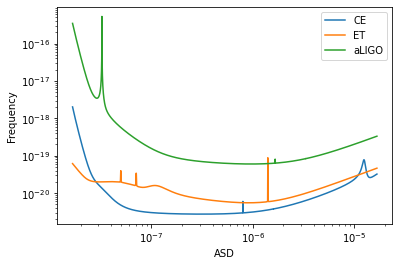

In [10]:
plt.loglog(ce_fs, ce_asd, label='CE')
plt.loglog(ce_fs, et_asd, label='ET')
plt.loglog(ce_fs, aligo_asd, label='aLIGO')
plt.xlabel('ASD')
plt.ylabel('Frequency')
plt.legend()

In [11]:
file=h5py.File('Pop.h5','r')
Mcz_true=np.zeros(NEVENTS)
deff_true=np.zeros(NEVENTS)

for i in range(NEVENTS):
    Mcz_true[i]=np.array(file['Mcz_true'+str(i)])
    deff_true[i]=np.array(file['deff_true'+str(i)])

Samples are generated for CE asd.

In [12]:
with h5py.File("Sam.h5", "w") as f:
    for i in range(NEVENTS):
        
        print('NEVENT=', i)
        
        Cov = np.linalg.inv(Fisher(Mcz_true[i], deff_true[i], ce_fs, aligo_asd))
        logMcz, logdeff = np.random.multivariate_normal((np.array([np.log(Mcz_true[i]), np.log(deff_true[i])])), Cov, NSAMPLE).T
        
        BNSMassDist_mean=1.35
        m1=m2=BNSMassDist_mean*A_M
        Mc=(m1*m2)**(0.6)/(m1+m2)**0.2
        logx_sam=logMcz-np.log(Mc)
        z_sam=np.exp(logx_sam)-1.

        f.create_dataset('cov'+str(i), data=Cov)
        f.create_dataset('z_med'+str(i), data=np.median(z_sam))
        f.create_dataset('z_sd'+str(i), data=np.std(z_sam))

        f.create_dataset('deff_med'+str(i), data=np.median(np.exp(logdeff)))
        f.create_dataset('deff_sd'+str(i), data=np.std(np.exp(logdeff)))
f.close()

NEVENT= 0
NEVENT= 1
NEVENT= 2
NEVENT= 3
NEVENT= 4
NEVENT= 5
NEVENT= 6
NEVENT= 7
NEVENT= 8
NEVENT= 9
NEVENT= 10
NEVENT= 11
NEVENT= 12
NEVENT= 13
NEVENT= 14
NEVENT= 15
NEVENT= 16
NEVENT= 17
NEVENT= 18
NEVENT= 19
NEVENT= 20
NEVENT= 21
NEVENT= 22
NEVENT= 23
NEVENT= 24
NEVENT= 25
NEVENT= 26
NEVENT= 27
NEVENT= 28
NEVENT= 29
NEVENT= 30
NEVENT= 31
NEVENT= 32
NEVENT= 33
NEVENT= 34
NEVENT= 35
NEVENT= 36
NEVENT= 37
NEVENT= 38
NEVENT= 39
NEVENT= 40
NEVENT= 41
NEVENT= 42
NEVENT= 43
NEVENT= 44
NEVENT= 45
NEVENT= 46
NEVENT= 47
NEVENT= 48
NEVENT= 49
NEVENT= 50
NEVENT= 51
NEVENT= 52
NEVENT= 53
NEVENT= 54
NEVENT= 55
NEVENT= 56
NEVENT= 57
NEVENT= 58
NEVENT= 59
NEVENT= 60
NEVENT= 61
NEVENT= 62
NEVENT= 63
NEVENT= 64
NEVENT= 65
NEVENT= 66
NEVENT= 67
NEVENT= 68
NEVENT= 69
NEVENT= 70
NEVENT= 71
NEVENT= 72
NEVENT= 73
NEVENT= 74
NEVENT= 75
NEVENT= 76
NEVENT= 77
NEVENT= 78
NEVENT= 79
NEVENT= 80
NEVENT= 81
NEVENT= 82
NEVENT= 83
NEVENT= 84
NEVENT= 85
NEVENT= 86
NEVENT= 87
NEVENT= 88
NEVENT= 89
NEVENT= 90
NEVENT= 9

NEVENT= 692
NEVENT= 693
NEVENT= 694
NEVENT= 695
NEVENT= 696
NEVENT= 697
NEVENT= 698
NEVENT= 699
NEVENT= 700
NEVENT= 701
NEVENT= 702
NEVENT= 703
NEVENT= 704
NEVENT= 705
NEVENT= 706
NEVENT= 707
NEVENT= 708
NEVENT= 709
NEVENT= 710
NEVENT= 711
NEVENT= 712
NEVENT= 713
NEVENT= 714
NEVENT= 715
NEVENT= 716
NEVENT= 717
NEVENT= 718
NEVENT= 719
NEVENT= 720
NEVENT= 721
NEVENT= 722
NEVENT= 723
NEVENT= 724
NEVENT= 725
NEVENT= 726
NEVENT= 727
NEVENT= 728
NEVENT= 729
NEVENT= 730
NEVENT= 731
NEVENT= 732
NEVENT= 733
NEVENT= 734
NEVENT= 735
NEVENT= 736
NEVENT= 737
NEVENT= 738
NEVENT= 739
NEVENT= 740
NEVENT= 741
NEVENT= 742
NEVENT= 743
NEVENT= 744
NEVENT= 745
NEVENT= 746
NEVENT= 747
NEVENT= 748
NEVENT= 749
NEVENT= 750
NEVENT= 751
NEVENT= 752
NEVENT= 753
NEVENT= 754
NEVENT= 755
NEVENT= 756
NEVENT= 757
NEVENT= 758
NEVENT= 759
NEVENT= 760
NEVENT= 761
NEVENT= 762
NEVENT= 763
NEVENT= 764
NEVENT= 765
NEVENT= 766
NEVENT= 767
NEVENT= 768
NEVENT= 769
NEVENT= 770
NEVENT= 771
NEVENT= 772
NEVENT= 773
NEVENT= 774
NEVE